In [0]:
"""Simple tutorial for using TensorFlow to compute polynomial regression.
Parag K. Mital, Jan. 2016"""
# %% Imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


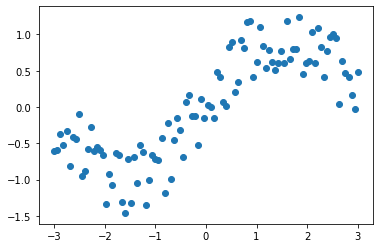

In [3]:
# %% Let's create some toy data
plt.ion()
n_observations = 100
fig, ax = plt.subplots(1, 1)
xs = np.linspace(-3, 3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
ax.scatter(xs, ys)
fig.show()
plt.draw()

In [0]:
# %% tf.placeholders for the input and output of the network. Placeholders are
# variables which we need to fill in when we are ready to compute the graph.
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [14]:
# %% Instead of a single factor and a bias, we'll create a polynomial function
# of different polynomial degrees.  We will then learn the influence that each
# degree of the input (X^0, X^1, X^2, ...) has on the final output (Y).
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(1, 5):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)
Y_pred

<tf.Tensor 'Add_7:0' shape=<unknown> dtype=float32>

In [13]:
# %% Loss function will measure the distance between our observations
# and predictions and average over them.
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2)) / (n_observations - 1)
print(cost)

Tensor("truediv_2:0", shape=(), dtype=float32)


In [0]:
# %% if we wanted to add regularization, we could add other terms to the cost,
# e.g. ridge regression has a parameter controlling the amount of shrinkage
# over the norm of activations. the larger the shrinkage, the more robust
# to collinearity.
# cost = tf.add(cost, tf.mul(1e-6, tf.global_norm([W])))

In [8]:
# %% Use gradient descent to optimize W,b
# Performs a single step in the negative gradient
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
# %% We create a session to use the graph
n_epochs = 10
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    sess.run(tf.global_variables_initializer())

    # Fit all training data
    prev_training_cost = 0.0
    for epoch_i in range(n_epochs):
        for (x, y) in zip(xs, ys):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        training_cost = sess.run(
            cost, feed_dict={X: xs, Y: ys})
        print(training_cost)

        if epoch_i % 100 == 0:
            ax.plot(xs, Y_pred.eval(
                feed_dict={X: xs}, session=sess),
                    'k', alpha=epoch_i / n_epochs)
            fig.show()
            plt.draw()

        # Allow the training to quit if we've reached a minimum
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break
        prev_training_cost = training_cost
ax.set_ylim([-3, 3])
fig.show()
plt.waitforbuttonpress()

23.623241
5.9038167
1.8205626
1.0568727
1.0067203
1.0572895
1.0891099
1.0932184
1.0789802
1.0548763


KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>